In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [3]:
train_data=pd.read_csv("F:\DataTrained project datasets/BigmartTrain.csv")

In [5]:
test_data=pd.read_csv("F:\DataTrained project datasets/BigmartTest.csv")

In [11]:
train_data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
train_data["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [13]:
train_data.shape

(8523, 12)

In [14]:
train_data["Item_Identifier"].value_counts()

FDG33    10
FDW13    10
FDX31     9
NCQ06     9
NCY18     9
         ..
FDY43     1
FDE52     1
FDQ60     1
FDO33     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [17]:
train_data.drop("Item_Identifier",axis=1,inplace=True)

item_identifier column is of no use in deciding the outlet_sales hence we drop the column

In [18]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


in Item outlet sales there seems to be outliers are present as max varies from 75th%

In [21]:
train_data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
train_data["Item_Weight"]=train_data["Item_Weight"].fillna((train_data["Item_Weight"].mean()))


In [41]:
train_data.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight                     0
dtype: int64

In [52]:
train_data["Outlet_Size"]=train_data["Outlet_Size"].fillna((train_data["Outlet_Size"].mode().values[0]))


two columns ie."Item WEight" and "outlet size have large number of nan values we will fix that.

Item_Weight                     AxesSubplot(0.125,0.536818;0.227941x0.343182)
Item_Visibility              AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Item_MRP                     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Outlet_Establishment_Year          AxesSubplot(0.125,0.125;0.227941x0.343182)
Item_Outlet_Sales               AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

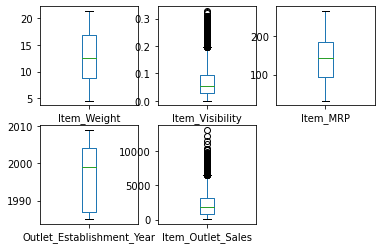

In [25]:
train_data.plot(kind="box",subplots=True,layout=(2,3))

In [44]:
train_data.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight                     0
dtype: int64

In [53]:
train_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight                  0
dtype: int64

Nan values have been removed

In [54]:
from scipy.stats import zscore

In [55]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,12.857645
std,4.226124,0.051598,62.275067,8.371760,1706.499616,4.226124
min,4.555000,0.000000,31.290000,1985.000000,33.290000,4.555000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,9.310000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,12.857645
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,16.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,21.350000


In [56]:
Q3=train_data["Item_Outlet_Sales"].quantile(.75)

In [57]:
Q1=train_data['Item_Outlet_Sales'].quantile(.25)

In [58]:
IQR=Q3-Q1

In [61]:
Upperlimit=Q3+IQR*1.5


In [62]:
Lowerlimit=Q1-1.5*IQR

In [63]:
data=train_data[(train_data["Item_Outlet_Sales"]>Lowerlimit)&(train_data["Item_Outlet_Sales"]<Upperlimit)]

In [64]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,19.20
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [66]:
Upperlimit

6501.8699

In [67]:
data["Item_Outlet_Sales"].max()

6478.234

In [68]:
Lowerlimit

-2566.3261

In [69]:
data["Item_Outlet_Sales"].min()

33.29

hent we removed outliers from Item outley sales column

In [73]:
Q3=train_data["Item_Visibility"].quantile(.75)
Q1=train_data["Item_Visibility"].quantile(.25)


IQR=Q3-Q1

In [74]:
Q1

0.026989477499999998

In [75]:
Q3

0.0945852925

In [76]:
IQR=Q3-Q1

In [77]:
IQR

0.067595815

In [78]:
Upperlimit=Q3+1.5*IQR
Lowerlimit=Q1-1.5*IQR

In [79]:
df=data[(data["Item_Visibility"]>Lowerlimit)&(data["Item_Visibility"]<Upperlimit)]

In [80]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,19.20
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [83]:
df["Item_Visibility"].max()

0.195721125

In [84]:
df["Item_Visibility"].min()

0.0

In [85]:
Upperlimit

0.195979015

In [87]:
Lowerlimit

-0.07440424500000001

hence we have removed the outliers from Item_visibility column as well ans our final dat is df which we are going to use 

In [88]:
df.skew()

Item_Weight                  0.087879
Item_Visibility              0.735164
Item_MRP                     0.151462
Outlet_Establishment_Year   -0.438117
Item_Outlet_Sales            0.768515
Item_Weight                  0.087879
dtype: float64

<AxesSubplot:ylabel='Frequency'>

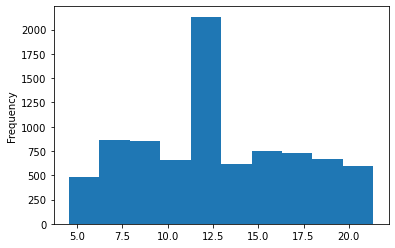

In [89]:
data["Item_Weight"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

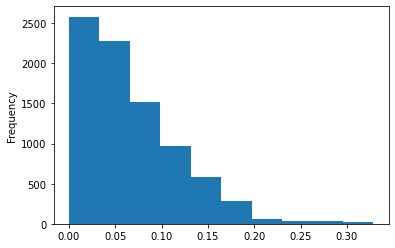

In [91]:
data["Item_Visibility"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

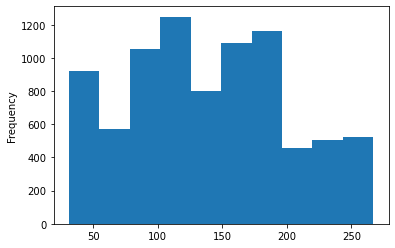

In [92]:
data["Item_MRP"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

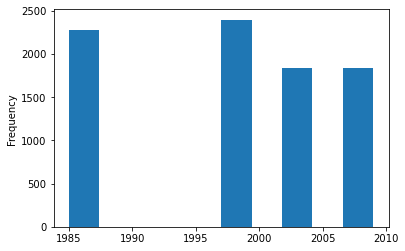

In [93]:
data["Outlet_Establishment_Year"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

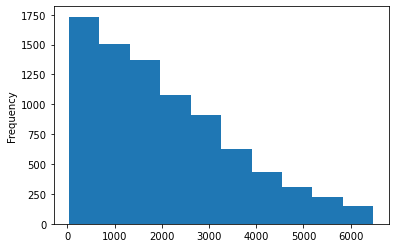

In [94]:
data["Item_Outlet_Sales"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

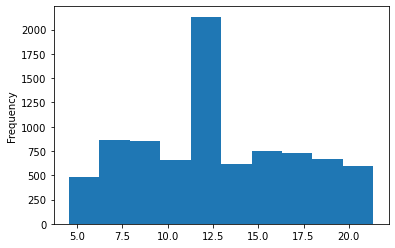

In [95]:
data["Item_Weight"].plot.hist()

In [100]:
import warnings
warnings.simplefilter('ignore')

In [101]:
df["Item_Outlet_Sales"]=np.log(df["Item_Outlet_Sales"])

In [102]:
df.skew()

Item_Weight                  0.087879
Item_Visibility              0.735164
Item_MRP                     0.151462
Outlet_Establishment_Year   -0.438117
Item_Outlet_Sales           -1.444926
Item_Weight                  0.087879
dtype: float64

In [105]:
df["Item_Visibility"]=np.sqrt(df["Item_Visibility"])

In [106]:
df.skew()

Item_Weight                  0.087879
Item_Visibility                   NaN
Item_MRP                     0.151462
Outlet_Establishment_Year   -0.438117
Item_Outlet_Sales           -1.444926
Item_Weight                  0.087879
dtype: float64

In [107]:
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility              8193
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight                     0
dtype: int64

In [108]:
df.drop("Item_Visibility",axis=1,inplace=True)

In [109]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,9.30,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,2.107244,9.30
1,5.92,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,1.807391,5.92
2,17.50,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2.034495,17.50
3,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,1.886509,19.20
4,8.93,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,1.931876,8.93


In [110]:
df.shape

(8193, 11)

hence we have removed the skewness and dropped the item visibility column

In [114]:
corr_hmap=df.corr()

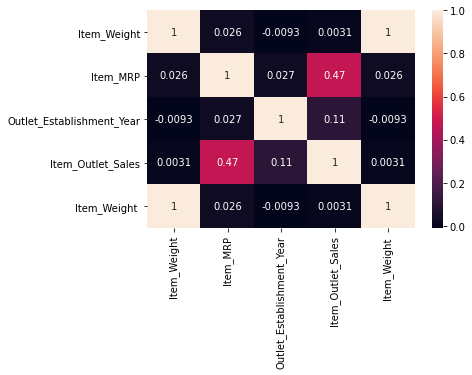

In [115]:
sns.heatmap(corr_hmap,annot=True)
plt.show()

item mrp has the positive relation with outlet sales also eastablishmet year has positive correlation with outlet saales 

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
le=LabelEncoder()

In [141]:
list=["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"]
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))


In [142]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight
0,9.30,1,14,249.8092,9,1999,1,0,1,9.30
1,5.92,2,10,48.2692,3,2009,1,2,2,5.92


In [144]:
x_train=df

In [146]:
test_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [147]:
test_data.shape

(5681, 11)